# Finding insights

### Introduction

In the last lesson, we built up a library to quickly explore our data.  But just printing out a mess of graphs is of little use without some thought behind them.  So in this lesson, let's try to find interesting things in the data.

### Loading our data

In [1]:
from sqlalchemy import create_engine
# change the jeffreykatz to your postgres username
conn_string = 'postgresql://jeffreykatz@localhost/ecommerce'
engine = create_engine(conn_string)

In [3]:
import pandas as pd

transactions_df = pd.read_sql('select * from transactions', engine)
transactions_df[:2]

,index,transaction_id,customer_id,product,gender,device_type,country,state,city,category,...,delivery_type,quantity,transaction_start,transaction_result,amount,individual_price,month,week,dow,hour
0,0,40170,1348959766,Hair Band,Female,Web,United States,New York,New York City,Accessories,...,one-day deliver,12,1,0,6910.0,576.0,11.0,46.0,4.0,22.0
1,1,33374,2213674919,Hair Band,Female,Web,United States,California,Los Angles,Accessories,...,one-day deliver,17,1,1,1699.0,100.0,5.0,19.0,6.0,6.0


### What's interesting

What does it mean to find interesting components of the data?  Well one way is to look for movement -- or differences in the data.  So for example, earlier we saw that there were differences in sales by location -- with new york having the fewest sales by city.  

city


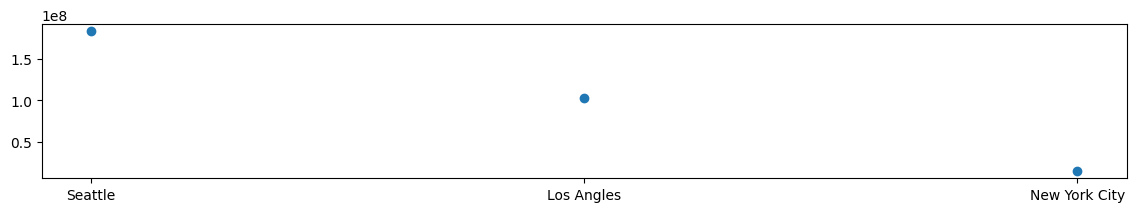

In [6]:
from lib import *
group_and_print('transactions', ['city'], 'amount', engine)

So here we found our first difference.  Each difference in the data offers a question.  Why?  Why is there a difference in sales by city.  Now we could go deeper on this one individual difference, trying to get to the bottom of it.  

But we're probably not ready for that yet.  Instead, we have a function that allows us to easily see difference in sales by different attributes so let's take advantage of it.

This way, we can get a sense of a lot of differences in the data and go from there.

### Start Broad and go narrow

Really, what we're trying to do, is get an overview of what's going on in our data as quickly and easily as possible.  It also allows us to follow another strategy with data analysis:

* **start broad and go narrow**

In other words, we don't know what direction to dig deeper in at first, so let's just get an overview, and then we can go from there.

So from here, we could just call `group_and_print` on all of our columns, but it's probably better to group our columns category -- this will allow us to see trends across different columns.

> So let's start by printing out all of our columns

In [7]:
transactions_df.columns

Index(['index', 'transaction_id', 'customer_id', 'product', 'gender',
       'device_type', 'country', 'state', 'city', 'category',
       'customer_login_type', 'delivery_type', 'quantity', 'transaction_start',
       'transaction_result', 'amount', 'individual_price', 'month', 'week',
       'dow', 'hour'],
      dtype='object')

And then begin to organize them:

In [16]:
time_cols = ['month', 'week', 'dow', 'hour']
customer_cols = ['gender', 'customer_id']

product_cols = ['product', 'category', 'individual_price']
channels = ['device_type', 'customer_login_type', 'delivery_type']
transactions = ['transaction_id', 'quantity', 'transaction_start', 'transaction_result']

Then we can quickly expore them.

product


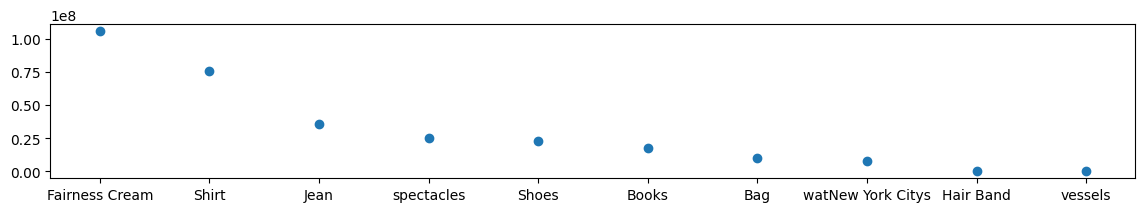

category


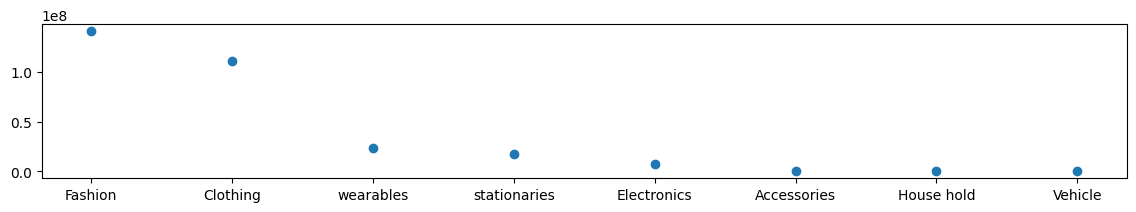

individual_price


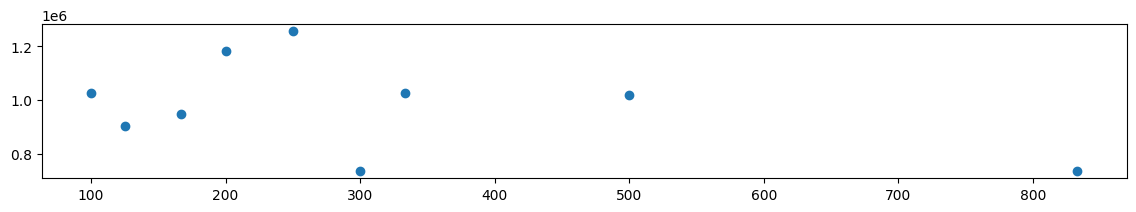

In [10]:
group_and_print('transactions', product_cols, 'amount', engine)

So above, we can get a sense of our popular products.  But notice that `individual_price` is a confusing category to group by, as we are summing up the revenue.  So while we can see that highest amount is by where the price is 250, what might be more interesting is how the number of orders change as the price changes.  

In [12]:
def group_by_count(col, table_name, engine):
    query = f"""select {col}, count(*) num from {table_name} group by {col} order by {col} asc"""
    grouped = pd.read_sql(query, engine)
    return grouped

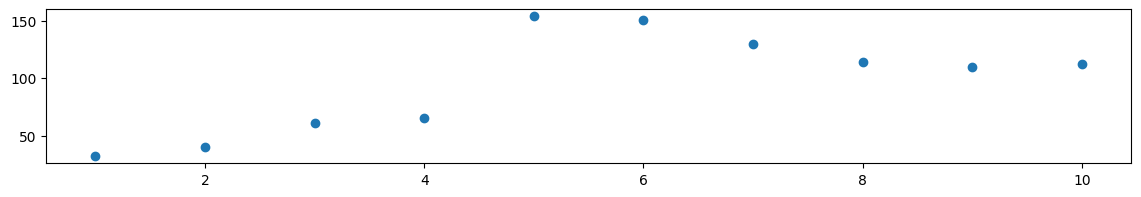

In [15]:
grouped = group_by_count('individual_price', 'transactions', engine)
print_grouped_by(grouped[1:])

It appears that most of the sales are in the 5 - 8 dollar range, which perhaps tells us about our products or our customers.  What's particularly interesting is that we would expect the popular products of face creams, and clothing to be more expensive.  

But this is just good to note for now -- we could perhaps look at the prices of individual products later.  But again, we should stay big picture at this stage.

### Next category

device_type


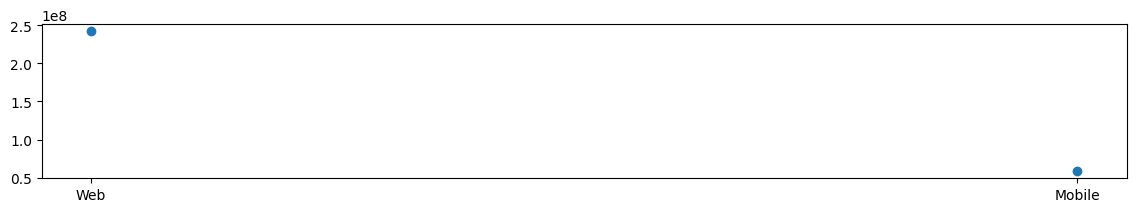

customer_login_type


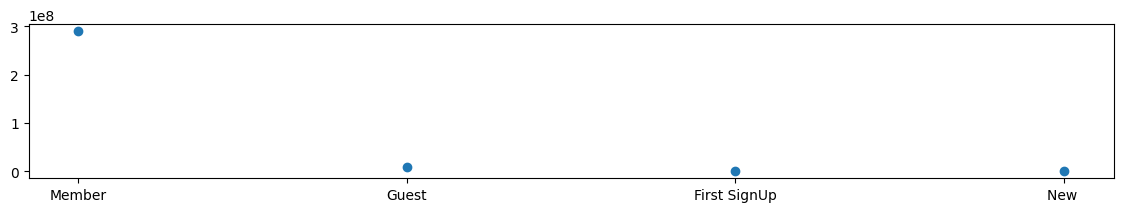

delivery_type


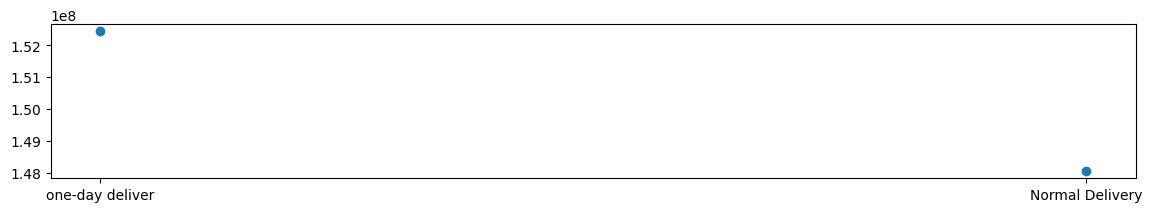

In [17]:
group_and_print('transactions', channels, 'amount', engine)

So again, we have some interesting information here.  With the trends in one day delivery and members seemingly reinforcing each other -- a lot of our customers are members, and they likely have one day delivery.

Is this interesting?  Probably.  It seems like most of our customers are members -- which is good because we have a loyal following.  But bad, because if we lose these customers it doesn't look like we are gaining many new ones, or guests.

In [ ]:
### Low hanging fruit